# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency

In [167]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [169]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [170]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [171]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [172]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [173]:
df.tail(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49990,1,Internet,RoundTrip,12,6,10,6,PERPNH,Australia,0,0,0,5.62,0
49991,1,Internet,RoundTrip,8,6,6,1,PERPNH,Australia,0,1,0,5.62,0
49992,1,Internet,RoundTrip,14,6,12,5,PERPNH,Australia,1,0,0,5.62,0
49993,1,Internet,RoundTrip,19,6,12,7,PERPNH,Australia,1,0,0,5.62,0
49994,2,Internet,RoundTrip,25,6,9,7,PERPNH,Australia,0,0,0,5.62,0
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,4,PERPNH,Australia,0,1,0,5.62,0


In [174]:
df.shape
max(df['purchase_lead'])

867

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [176]:
print(df.num_passengers.unique())
print(df.sales_channel.unique())
print(df.trip_type.unique())
print(df.route.unique())
print(df.booking_origin.unique())
print(df.wants_extra_baggage.unique())
print(df.flight_duration.unique())


[2 1 3 4 6 5 7 9 8]
['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']
['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 'CGKDEL' 'CGKHGH' 'CGKHND'
 'CGKICN' 'CGKIKA' 'CGKJED' 'CGKKIX' 'CGKKTM' 

In [177]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [178]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.count()

num_passengers           719
sales_channel            719
trip_type                719
purchase_lead            719
length_of_stay           719
flight_hour              719
flight_day               719
route                    719
booking_origin           719
wants_extra_baggage      719
wants_preferred_seat     719
wants_in_flight_meals    719
flight_duration          719
booking_complete         719
dtype: int64

In [179]:
#dropping duplicates
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.reset_index(drop=True, inplace=True)
df = df_no_duplicates

<ipython-input-180-8dd2229c7336>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


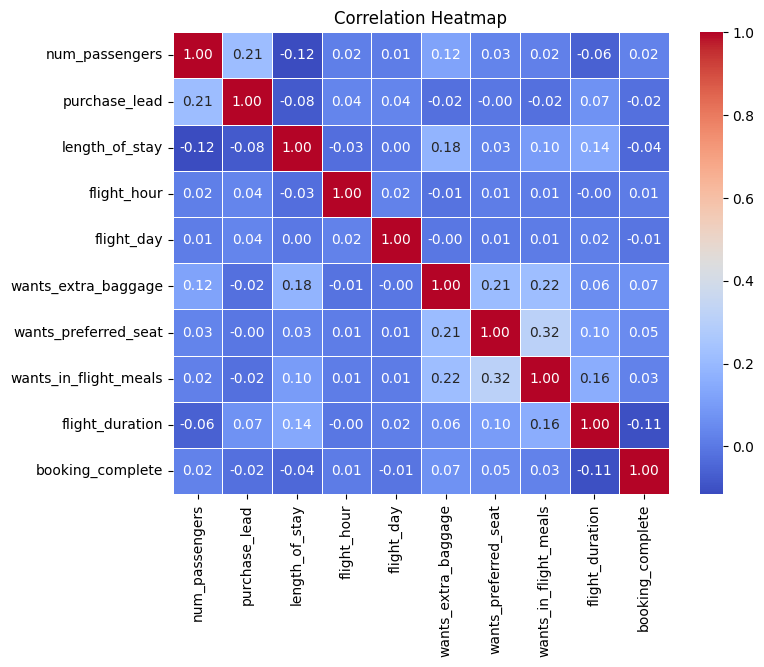

In [180]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Univariate Analysis


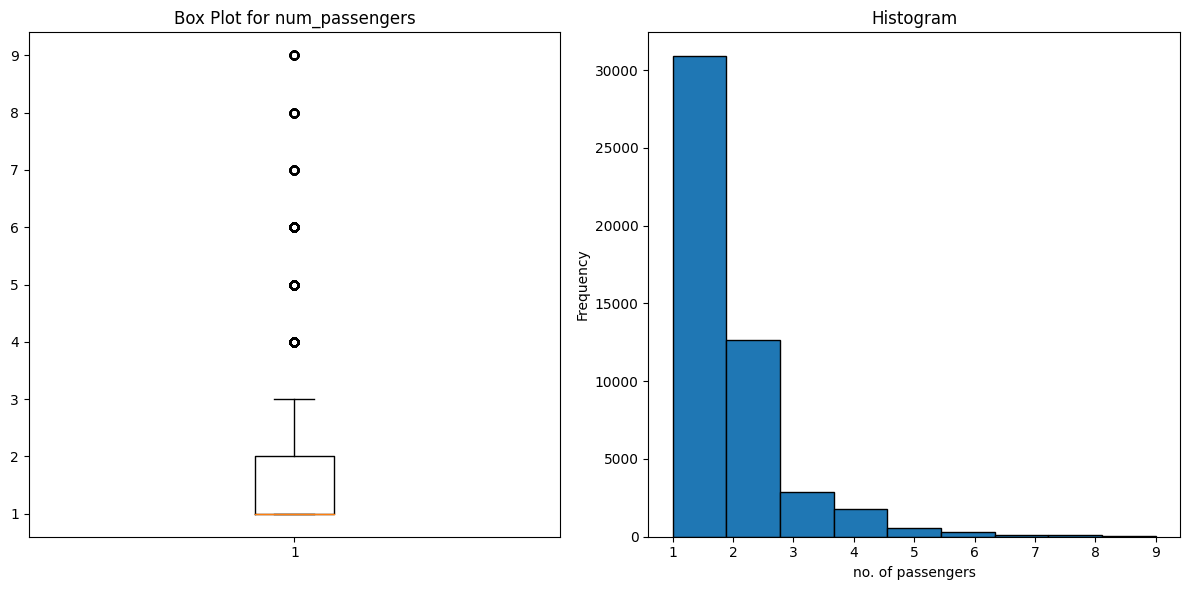

In [210]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].boxplot(df['num_passengers'])
axes[0].set_title('Box Plot for num_passengers')


axes[1].hist(df['num_passengers'], bins=9, edgecolor='black')
axes[1].set_title('Histogram')

axes[1].set_xlabel('no. of passengers')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


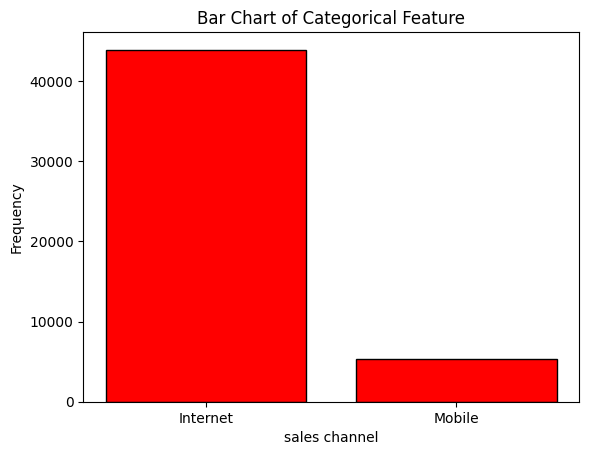

In [182]:
category_counts_sales_channel = df['sales_channel'].value_counts()

plt.bar(category_counts_sales_channel.index, category_counts_sales_channel.values, color='red', edgecolor='black')

plt.title('Bar Chart of Sales Channel')
plt.xlabel('sales channel')
plt.ylabel('Frequency')
plt.show()

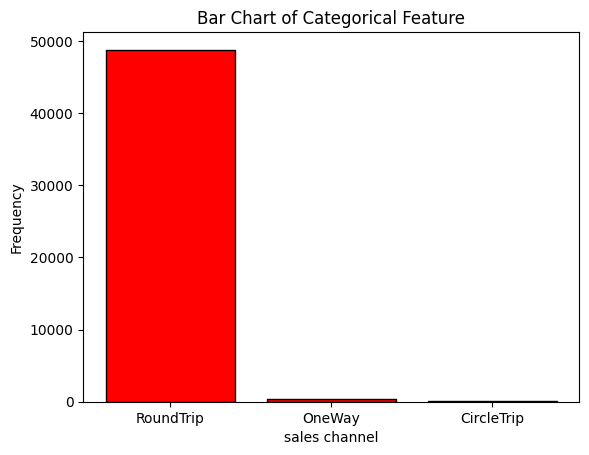

In [183]:
category_counts_trip_type = df['trip_type'].value_counts()
plt.bar(category_counts_trip_type.index, category_counts_trip_type.values, color='red', edgecolor='black')

plt.title('Bar Chart of Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Frequency')
plt.show()

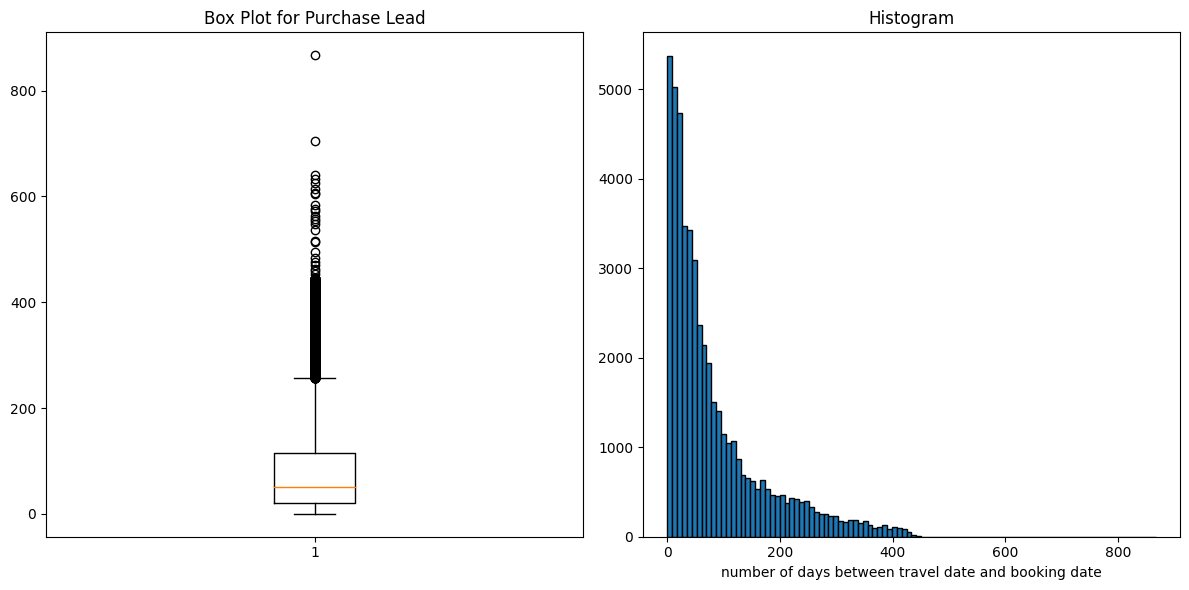

In [211]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].boxplot(df['purchase_lead'])
axes[0].set_title('Box Plot for Purchase Lead')

axes[1].hist(df['purchase_lead'], bins=100, edgecolor='black')
axes[1].set_title('Histogram')
axes[1].set_xlabel('number of days between travel date and booking date')


plt.tight_layout()
plt.show()


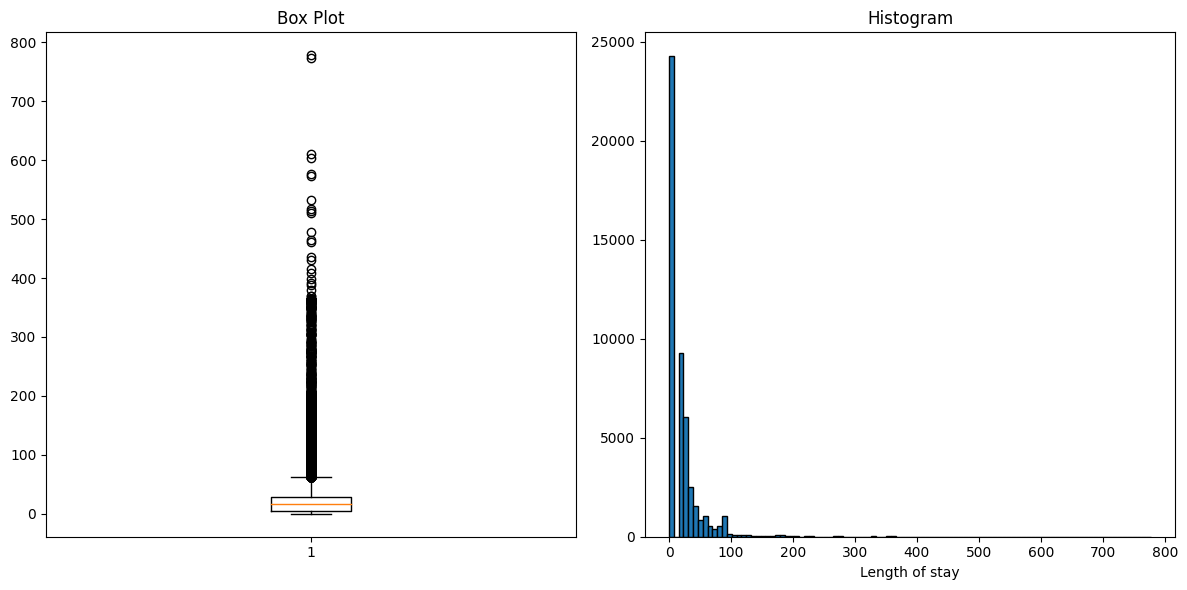

In [212]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].boxplot(df['length_of_stay'])
axes[0].set_title('Box Plot')

axes[1].hist(df['length_of_stay'], bins=100, edgecolor='black')
axes[1].set_title('Histogram')
axes[1].set_xlabel('Length of stay')

plt.tight_layout()
plt.show()


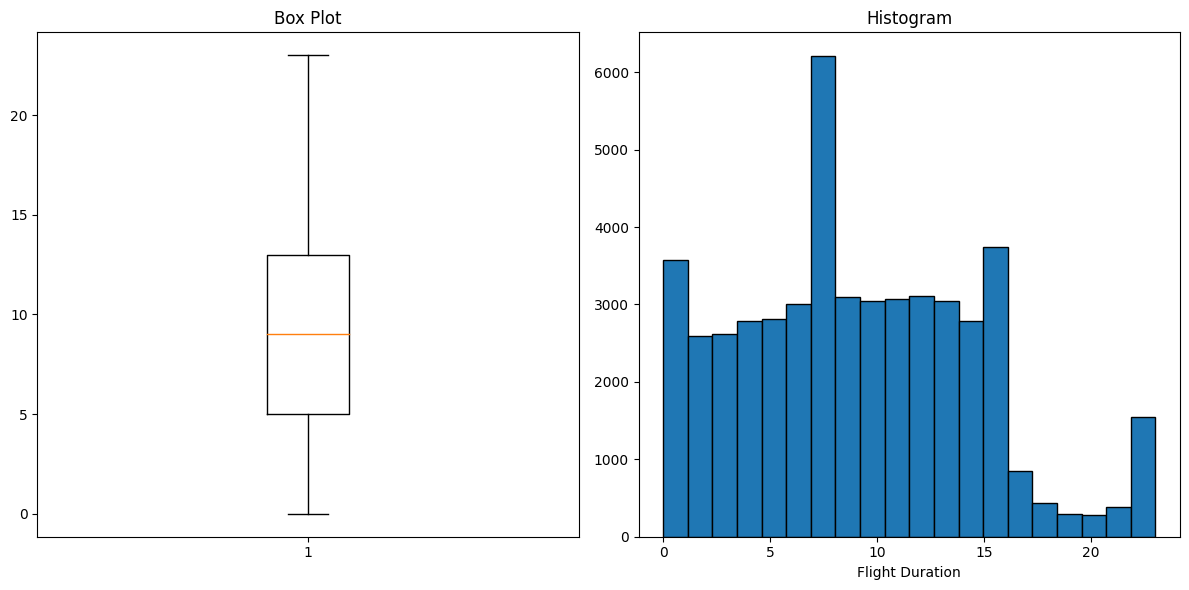

In [213]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].boxplot(df['flight_hour'])
axes[0].set_title('Box Plot')


axes[1].hist(df['flight_hour'], bins=20, edgecolor='black')
axes[1].set_title('Histogram')
axes[1].set_xlabel('Flight hour')

plt.tight_layout()
plt.show()


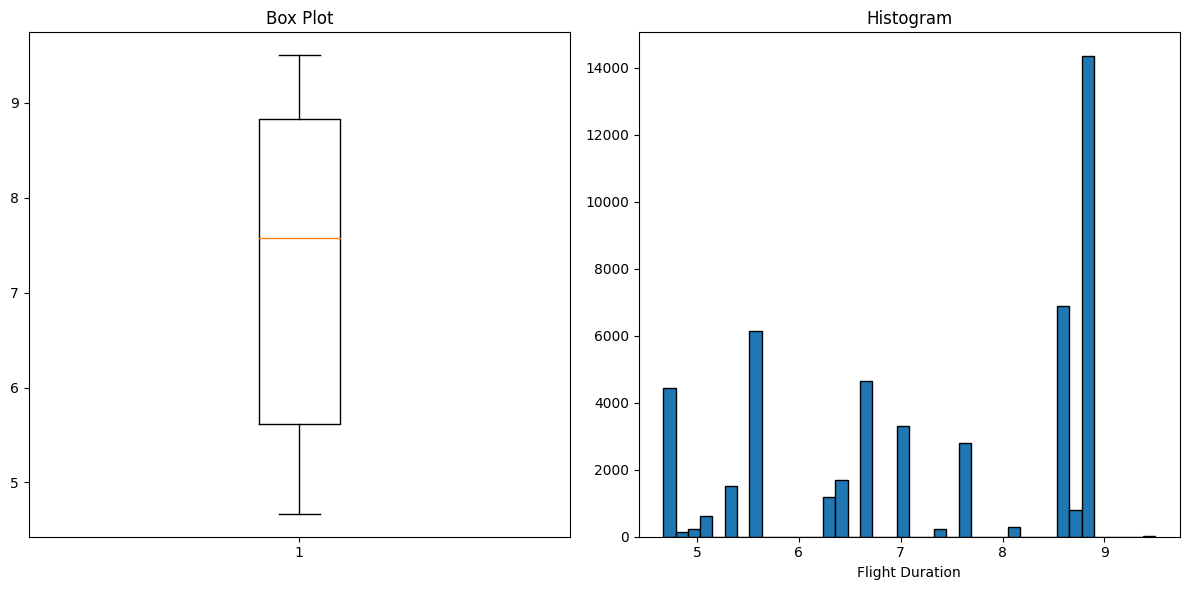

In [214]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].boxplot(df['flight_duration'])
axes[0].set_title('Box Plot')

axes[1].hist(df['flight_duration'], bins=40, edgecolor='black')
axes[1].set_title('Histogram')
axes[1].set_xlabel('Flight Duration')

plt.tight_layout()
plt.show()


0    41890
1     7391
Name: booking_complete, dtype: int64


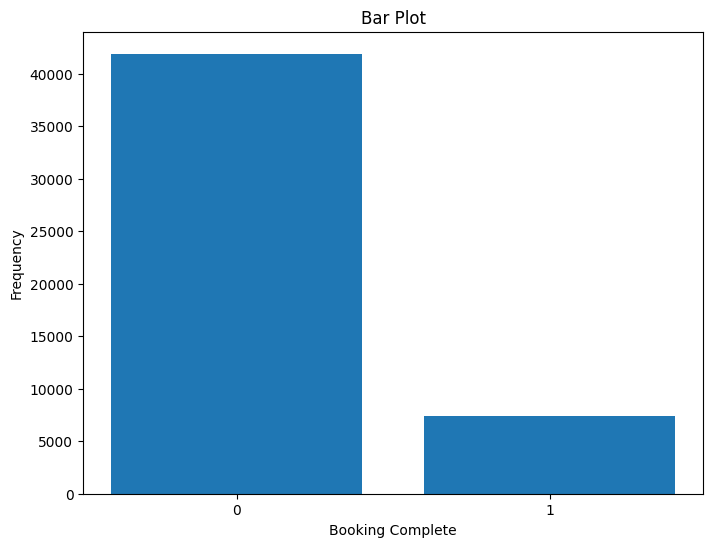

In [215]:
category_counts = df['booking_complete'].value_counts()
print(category_counts)

plt.figure(figsize=(8, 6))
plt.bar(['0','1'], category_counts.values)


plt.xlabel('Booking Complete')
plt.ylabel('Frequency')
plt.title('Bar Plot')


plt.show()

The target is highly imbalanced

In [189]:
# Null Hypothesis (H0) : Have no association with target
# Alternate Hypothesis (H1) : Have significant association with target

contingency_table = pd.crosstab(df['sales_channel'], df['booking_complete'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)


print("Chi-Squared Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Chi-Squared Statistic: 75.83658336155445
P-value: 3.081389983067326e-18
Degrees of Freedom: 1
Expected Frequencies Table:
booking_complete             0            1
sales_channel                              
Internet          37330.474828  6586.525172
Mobile             4559.525172   804.474828


Since the p-value is extremely low (close to zero) and far below the typical significance level of 0.05, we reject the null hypothesis. This suggests that there is a significant association between the two categorical variables that were tested with the chi-squared test.

In [190]:
# Null Hypothesis (H0) : Have no association with target
# Alternate Hypothesis (H1) : Have significant association with target

contingency_table = pd.crosstab(df['trip_type'], df['booking_complete'])
print(contingency_table)
print()
chi2, p_value, dof, expected = chi2_contingency(contingency_table)


print("Chi-Squared Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

booking_complete      0     1
trip_type                    
CircleTrip          111     5
OneWay              366    20
RoundTrip         41413  7366

Chi-Squared Statistic: 39.97597397957511
P-value: 2.0860636043201154e-09
Degrees of Freedom: 2
Expected Frequencies Table:
booking_complete             0            1
trip_type                                  
CircleTrip           98.602707    17.397293
OneWay              328.109008    57.890992
RoundTrip         41463.288286  7315.711714


Since the p-value is extremely low (close to zero) and far below the typical significance level of 0.05, we reject the null hypothesis. This suggests that there is a significant association between the two categorical variables that were tested with the chi-squared test.



# Feature Importance of categorical features

<ipython-input-191-0ca226750c7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sales_channel'] = X['sales_channel'].astype('category').cat.codes
<ipython-input-191-0ca226750c7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['trip_type'] = X['trip_type'].astype('category').cat.codes
<ipython-input-191-0ca226750c7a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

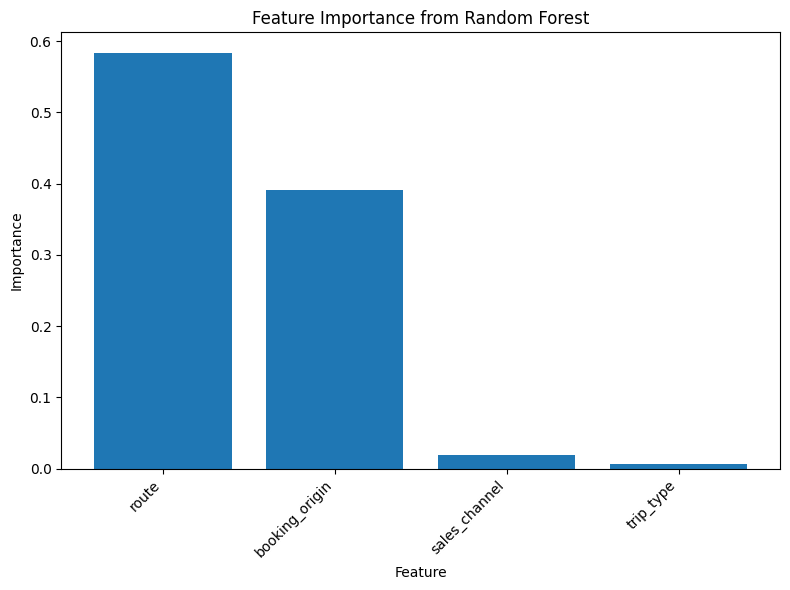

In [191]:
X = df[['sales_channel','trip_type','route',	'booking_origin']]
y = df['booking_complete']

X['sales_channel'] = X['sales_channel'].astype('category').cat.codes
X['trip_type'] = X['trip_type'].astype('category').cat.codes
X['route'] = X['route'].astype('category').cat.codes
X['booking_origin'] = X['booking_origin'].astype('category').cat.codes

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


'route' and 'booking_origin' features are found to be more significant. But these categorical features have high number of unique value. Applying OneHotEncoding on these features can lead to Curse of Dimentionality (overfitting), hence, it's better to drop them with minimal loss of information.


In [192]:
df = df.drop(['route','booking_origin'], axis=1)

# Encoding Categorical Features

In [193]:
#using OneHotEncoding on Categorical features having less unique values
one_hot_encoded_data = pd.get_dummies(df, columns = ['sales_channel', 'trip_type'])
df = one_hot_encoded_data
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,1,0,0,0,1


# Balancing the dataset

As from the univariate analysis section, we saw that the dataset is highly imbalance. This can cause our ML model to interpret wrong predictions. Let's balance this data.

In [200]:
from sklearn.utils import resample
not_booked = df[df['booking_complete'] == 0]
booked = df[df['booking_complete'] == 1]

undersampled_not_booked = resample(not_booked, n_samples=len(booked), random_state=42)

balanced_df = pd.concat([undersampled_not_booked, booked])

balanced_df = balanced_df.sample(frac=1, random_state=42)
balanced_df['booking_complete'].value_counts()

1    7391
0    7391
Name: booking_complete, dtype: int64

# Normalizing the data

In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(balanced_df)

scaled_data = scaler.transform(balanced_df)

scaled_df = pd.DataFrame(scaled_data, columns=balanced_df.columns)
scaled_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,0.370803,-0.237124,-0.551817,-0.765332,1.108279,-1.527919,-0.681494,-0.88871,-1.175634,1.0,0.324085,-0.324085,-0.036808,-0.070448,0.079569
1,-0.596753,-0.876616,-0.492310,0.167172,0.605761,-1.527919,-0.681494,-0.88871,-1.503945,1.0,0.324085,-0.324085,-0.036808,-0.070448,0.079569
2,-0.596753,-0.170970,-0.492310,0.726674,1.610796,0.654485,-0.681494,-0.88871,0.958390,-1.0,-3.085611,3.085611,-0.036808,-0.070448,0.079569
3,-0.596753,1.736481,0.549068,2.218681,1.610796,-1.527919,-0.681494,-0.88871,1.122545,-1.0,-3.085611,3.085611,-0.036808,-0.070448,0.079569
4,-0.596753,1.549044,-0.016252,-0.765332,-1.404309,0.654485,-0.681494,-0.88871,1.122545,1.0,0.324085,-0.324085,-0.036808,-0.070448,0.079569


# Splitting data for training and evaluation

In [206]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop('booking_complete', axis=1)
y = balanced_df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in X_test:", X_test.shape[0])
print("Number of samples in y_train:", y_train.shape[0])
print("Number of samples in y_test:", y_test.shape[0])


Number of samples in X_train: 11825
Number of samples in X_test: 2957
Number of samples in y_train: 11825
Number of samples in y_test: 2957


# ML Model - Support Vector Machine


In [207]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# train
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", str(accuracy*100)+'%')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 56.6452485627325%
Confusion Matrix:
 [[854 639]
 [643 821]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57      1493
           1       0.56      0.56      0.56      1464

    accuracy                           0.57      2957
   macro avg       0.57      0.57      0.57      2957
weighted avg       0.57      0.57      0.57      2957



# ML Model - Logistic Regression

In [208]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", str(accuracy*100)+'%')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.579979709164694
Confusion Matrix:
 [[820 673]
 [569 895]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.55      0.57      1493
           1       0.57      0.61      0.59      1464

    accuracy                           0.58      2957
   macro avg       0.58      0.58      0.58      2957
weighted avg       0.58      0.58      0.58      2957



# ML Model - Random Forest

In [209]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", str(accuracy*100)+'%')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.6587757862698681
Confusion Matrix:
 [[1015  478]
 [ 531  933]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67      1493
           1       0.66      0.64      0.65      1464

    accuracy                           0.66      2957
   macro avg       0.66      0.66      0.66      2957
weighted avg       0.66      0.66      0.66      2957

